In [2]:
from importlib import reload  # Python 3.4+
import XY_model
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncexpon
reload(XY_model)

<module 'XY_model' from '/Users/mw/PycharmProjects/xymodel-st-data/XY-MODEL/XY_model.py'>

sweeps=1
energy=-13.001036962997878

equilibrium state is reached at T=0.1
#sweep=502
energy=-19.481776791879167


/Users/mw/PycharmProjects/xymodel-st-data/XY-MODEL/XY_model.py:167: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


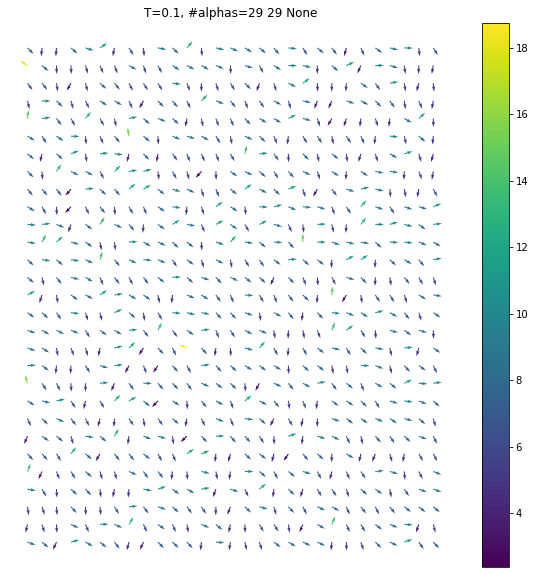

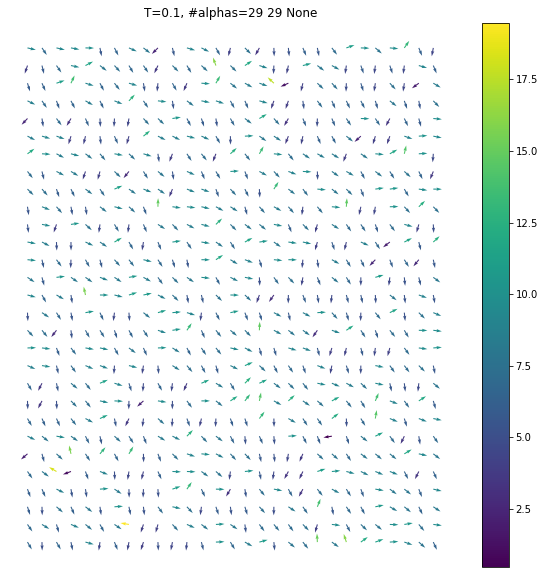

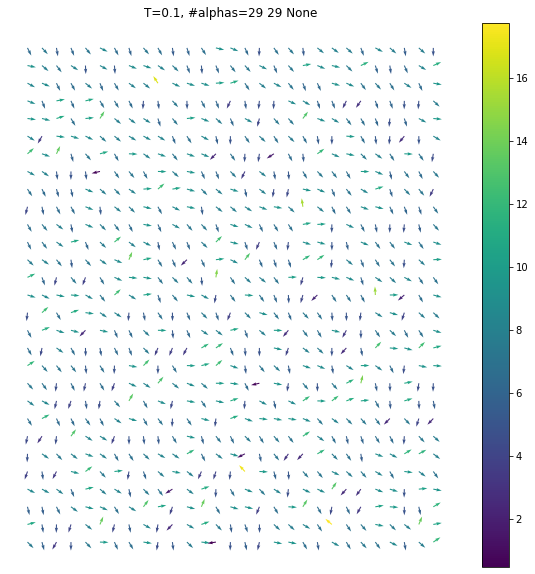

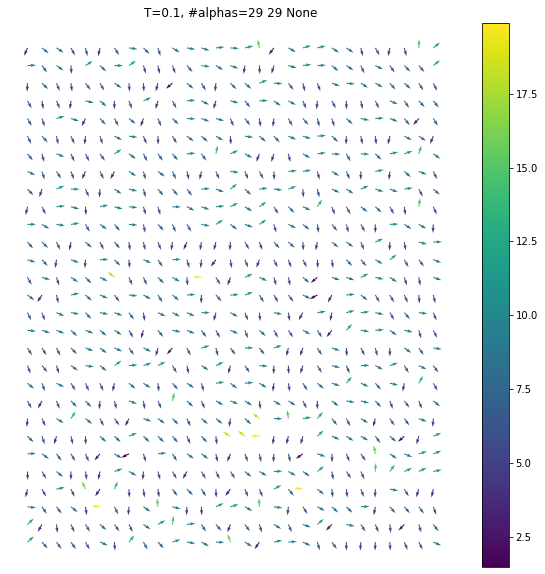

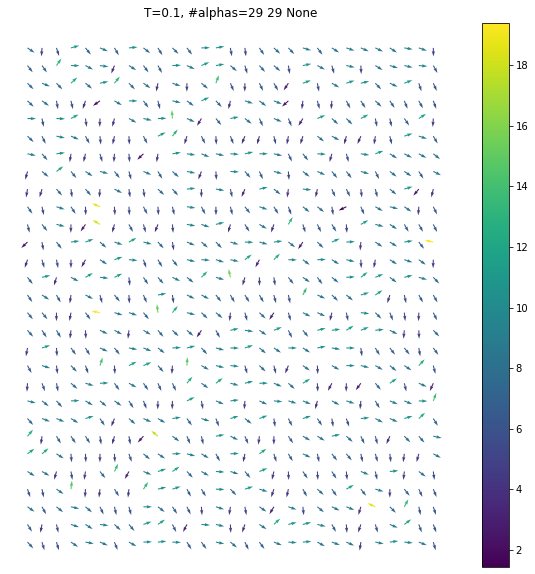

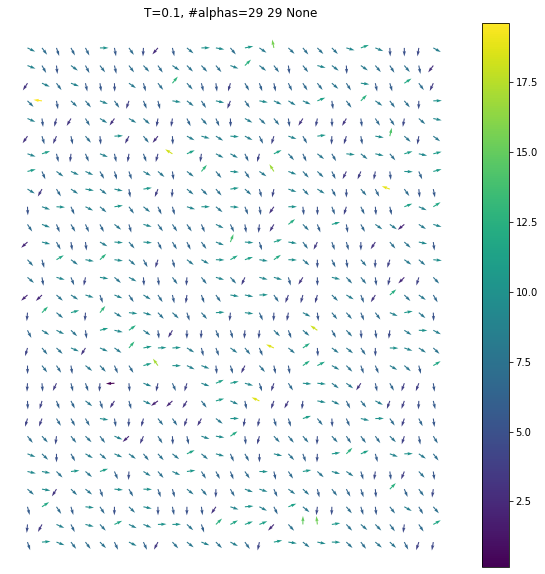

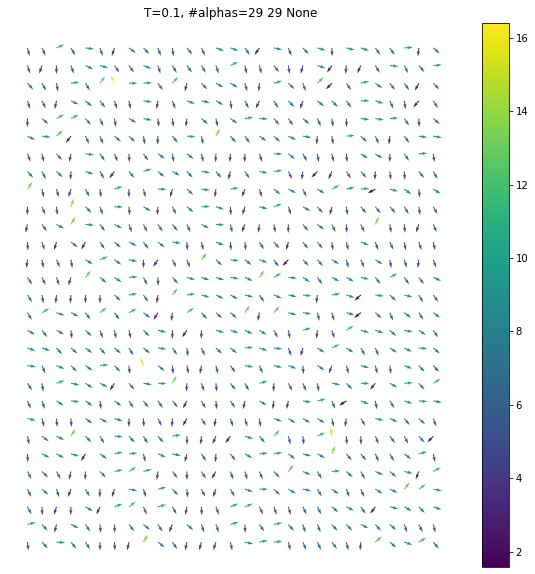

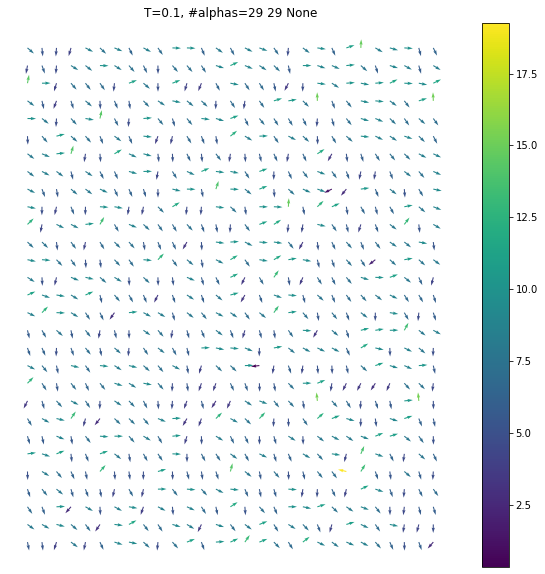

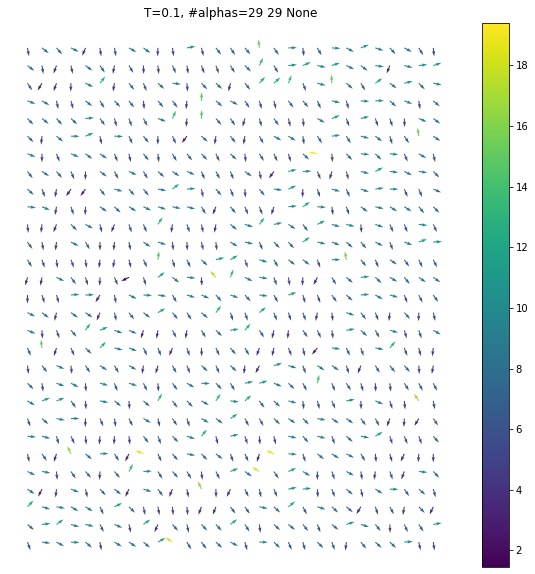

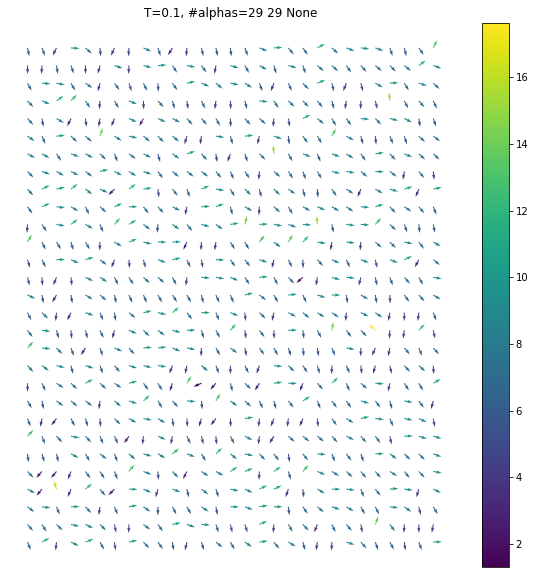

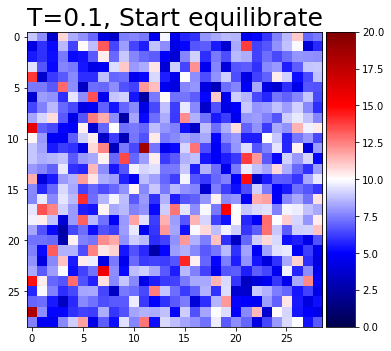

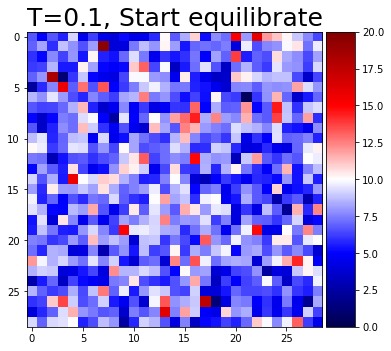

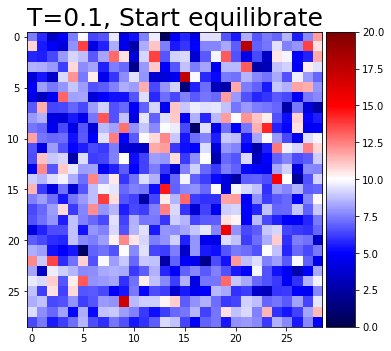

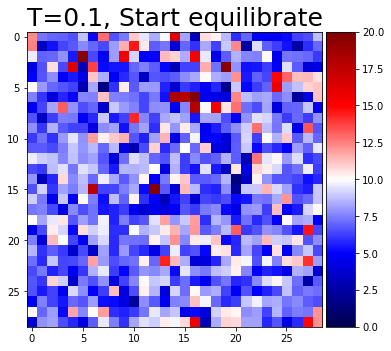

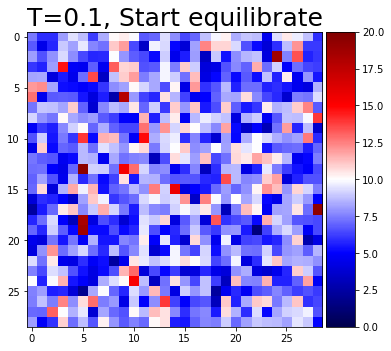

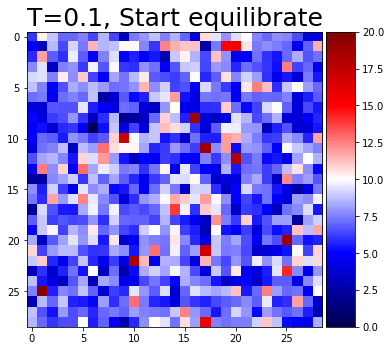

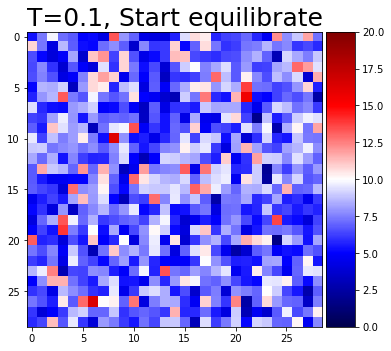

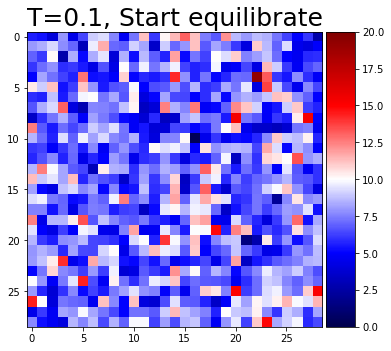

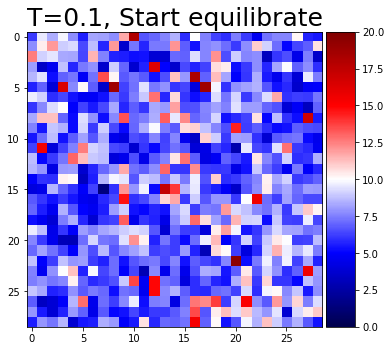

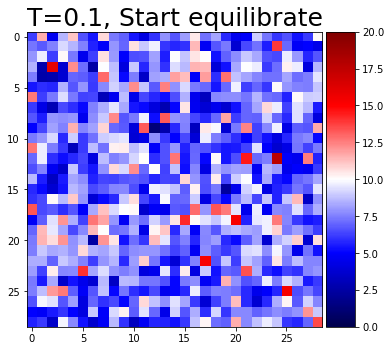

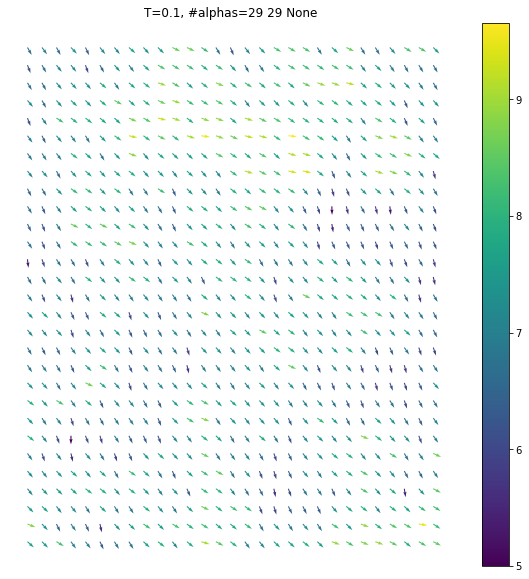

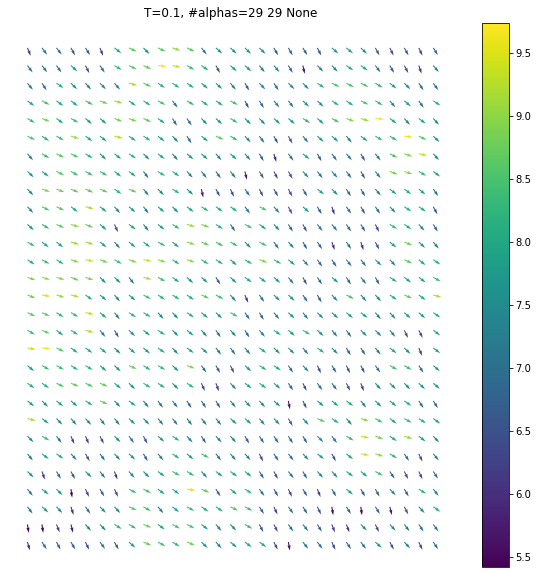

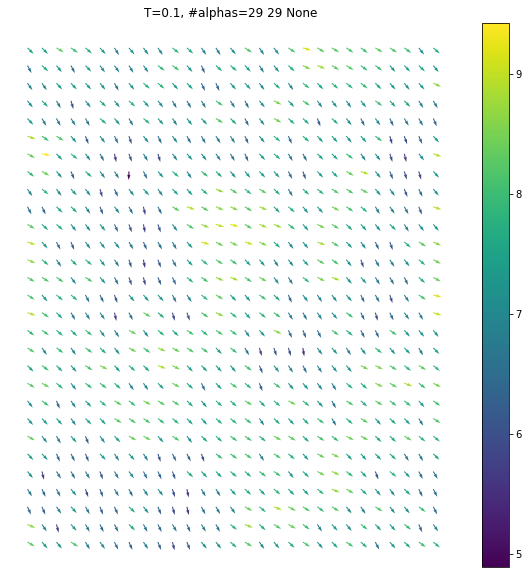

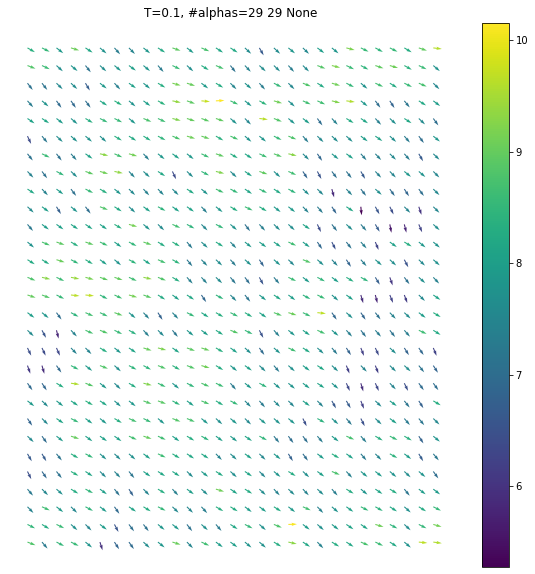

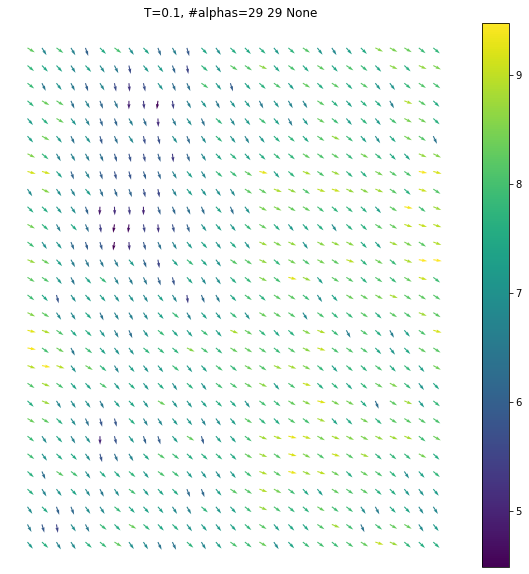

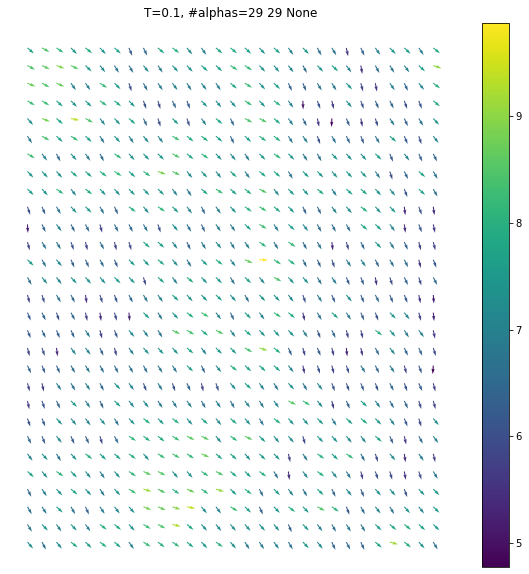

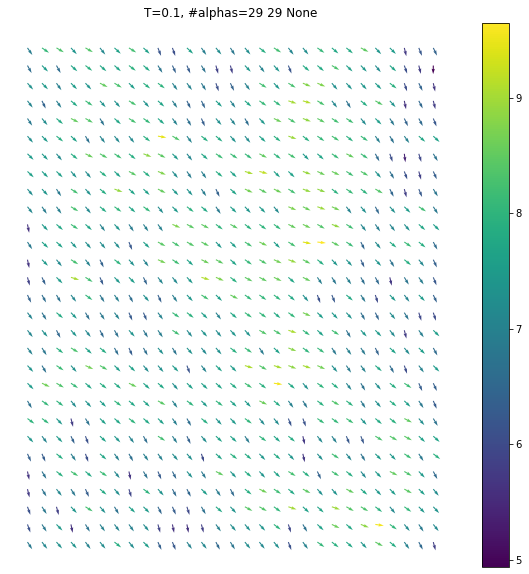

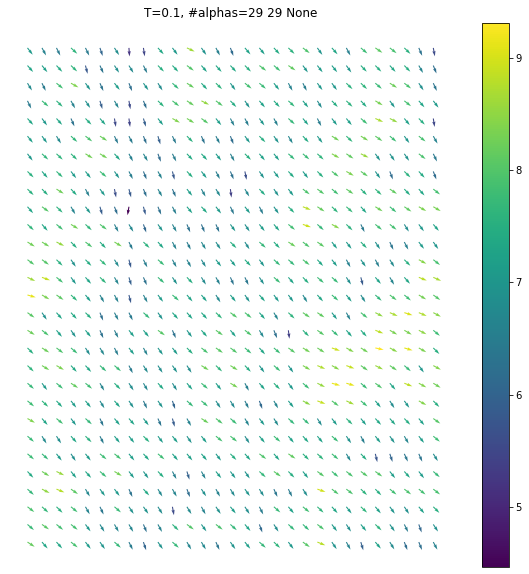

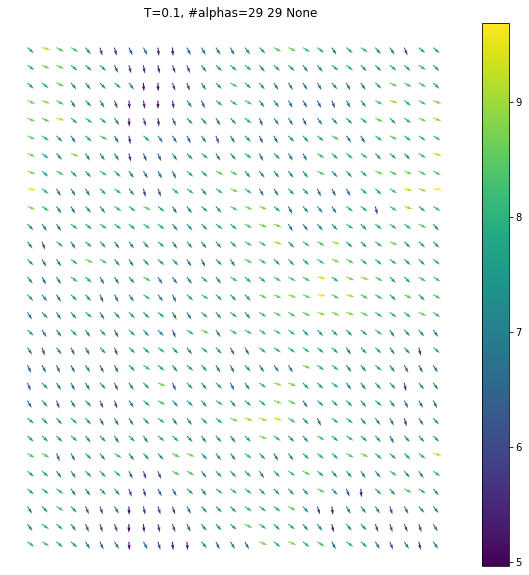

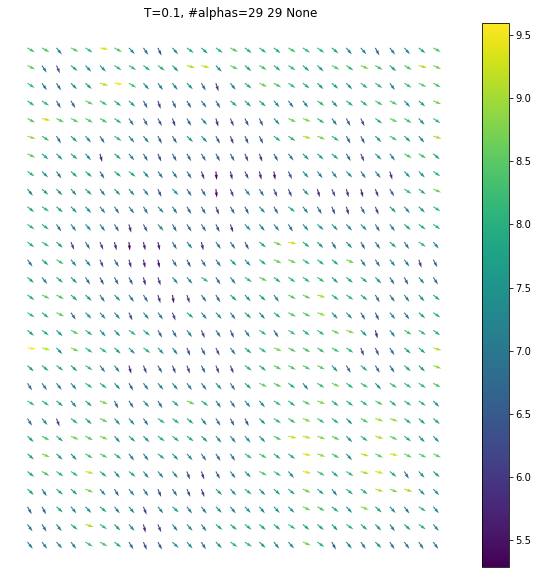

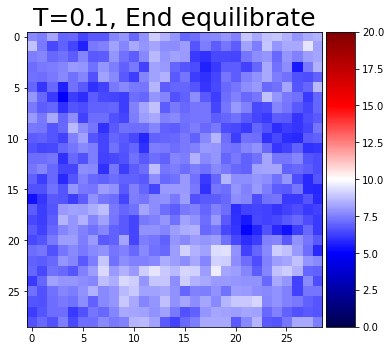

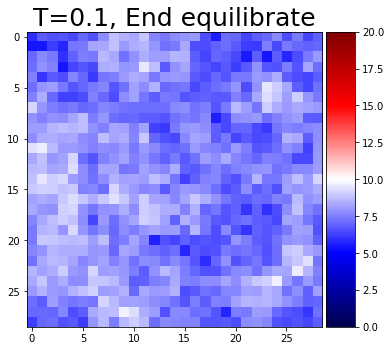

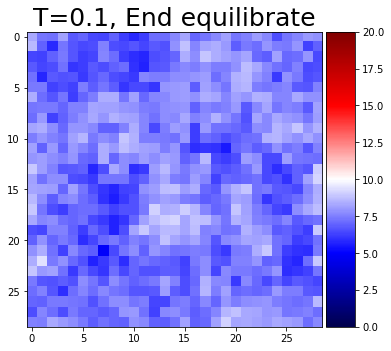

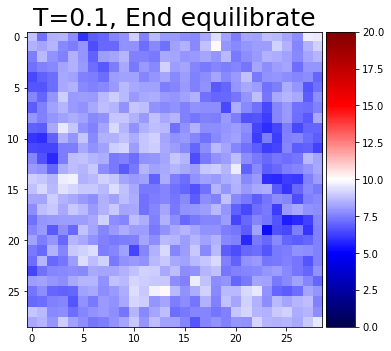

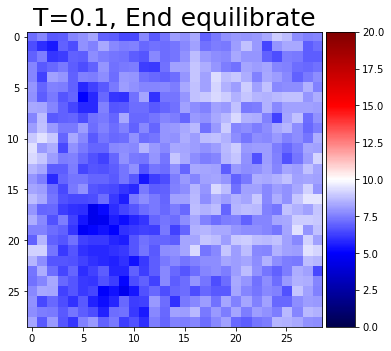

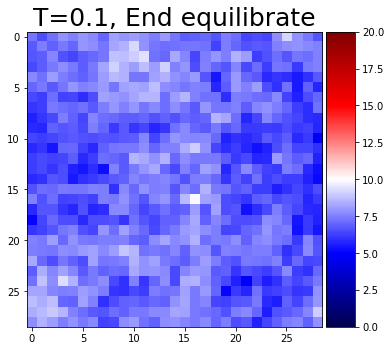

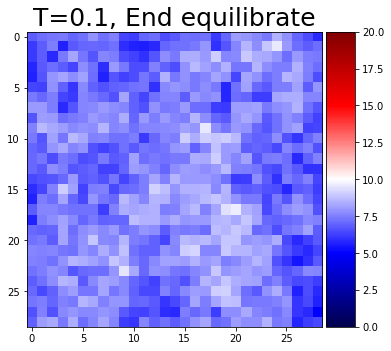

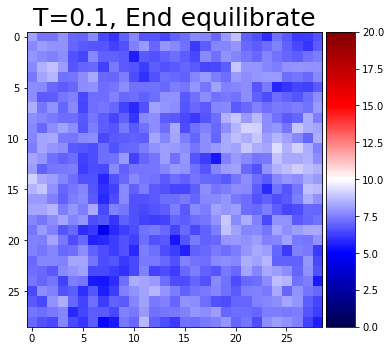

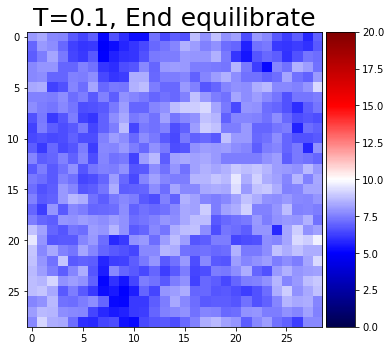

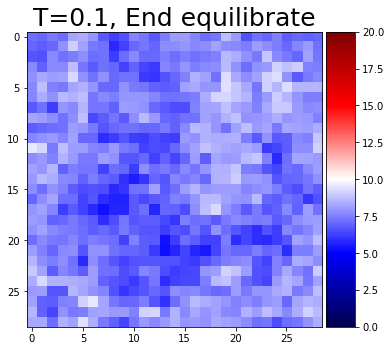

In [5]:
from XY_model import XYSystem
import pandas as pd 
from numpy import pi 

url = f"https://raw.githubusercontent.com/marcin119a/data-thetas-st/main/data_7_5/thetas_prior_1.csv"
thetas = pd.read_csv(url,  delimiter=',', header=None).to_numpy()
nSpots = 29*29
nTypes = 10 
b = 20

xy_system_1 = XYSystem(temperature=0.1, thetas=thetas, supp_end=b, boundary = -pi/2)
thetas_set = xy_system_1.equilibrate(show=True)


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def list2matrix(s):
    n = int(np.size(s))
    l = int(np.sqrt(n))
    s = np.reshape(s, (l, l))
    return s



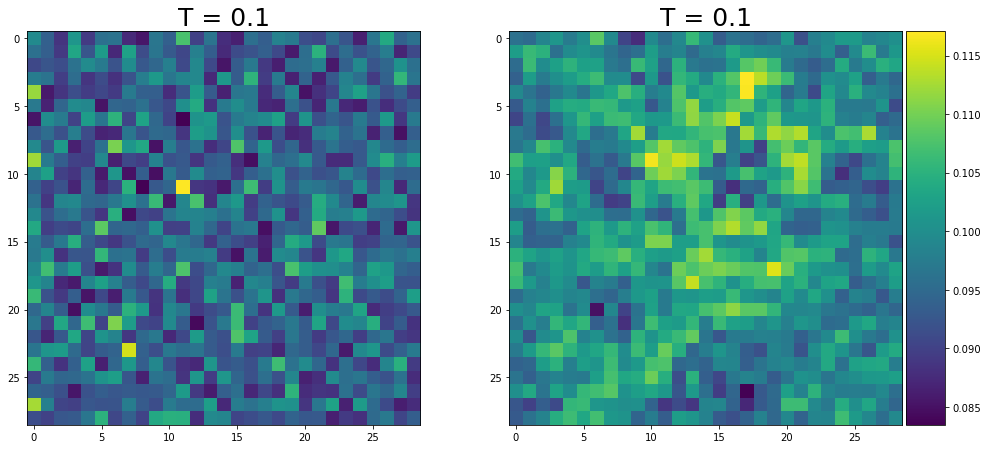

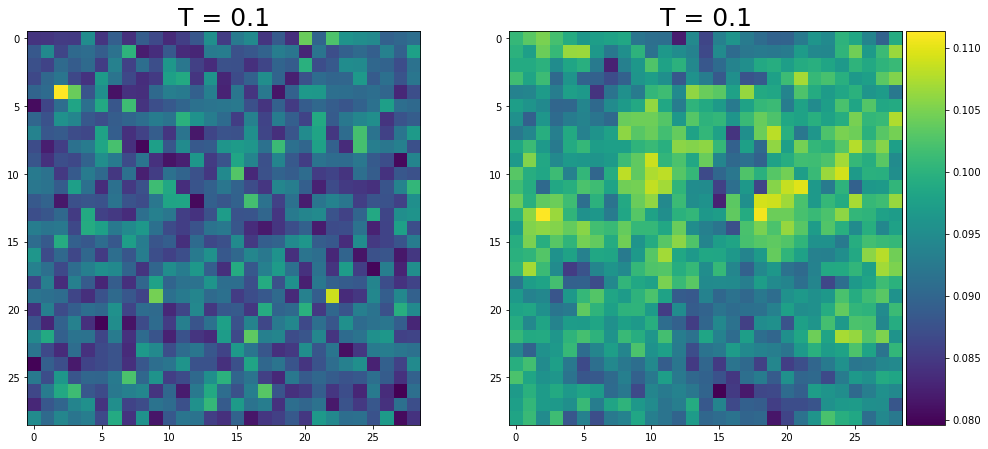

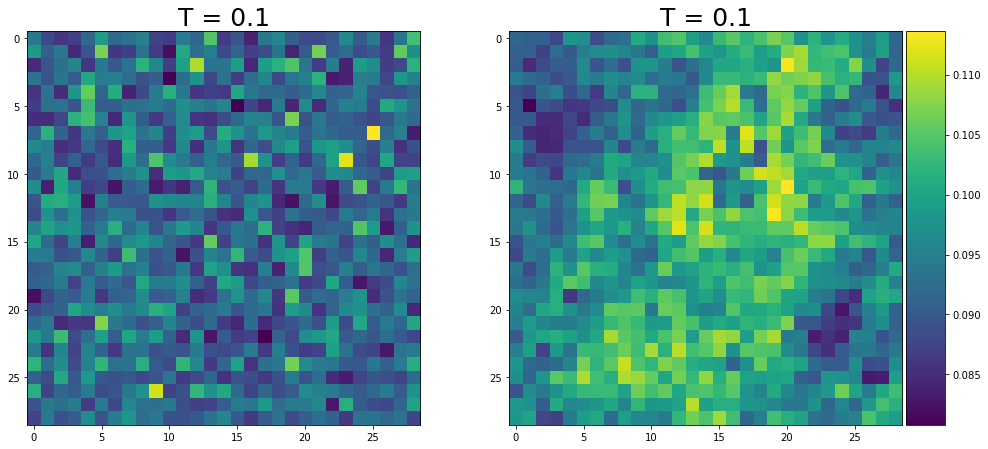

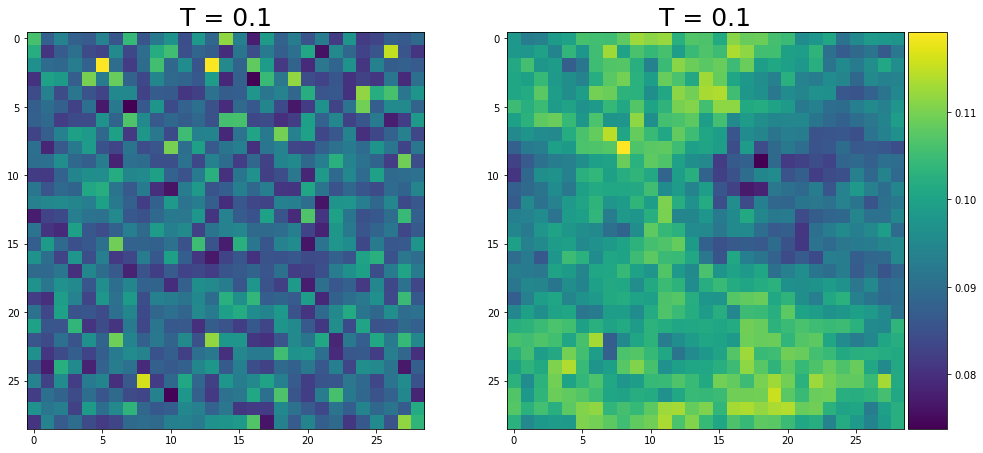

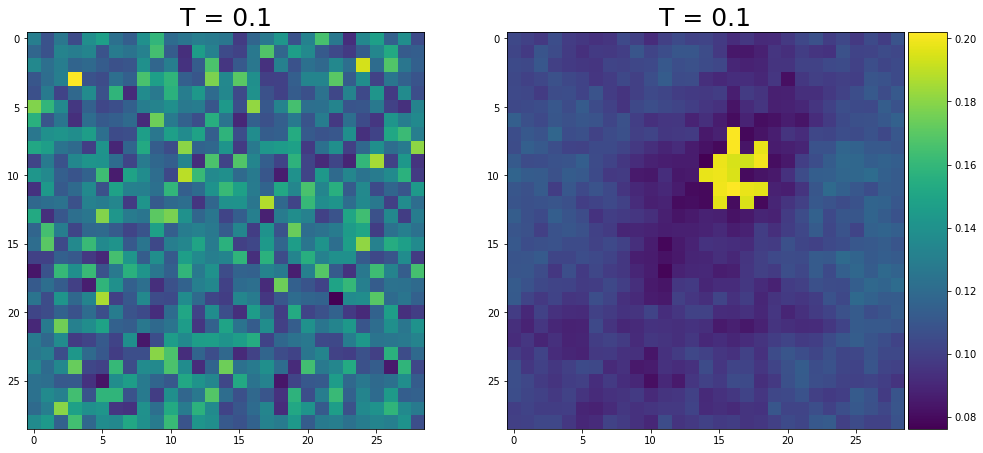

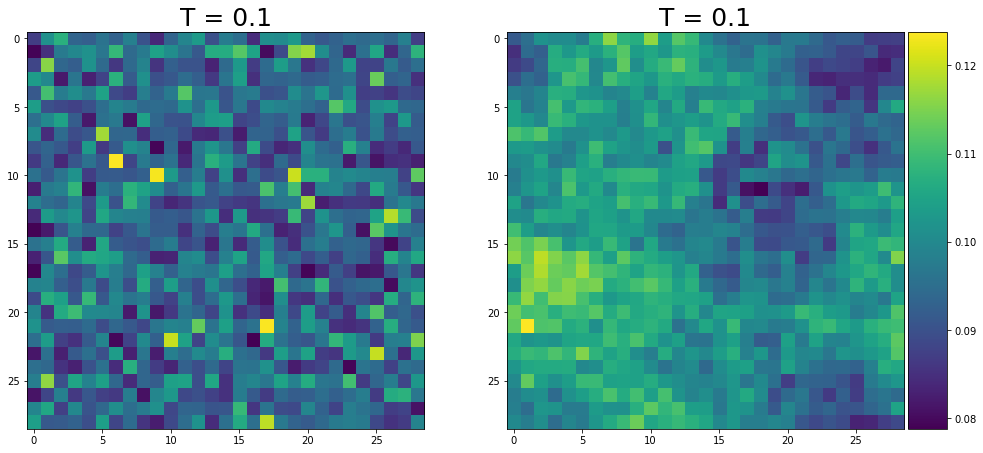

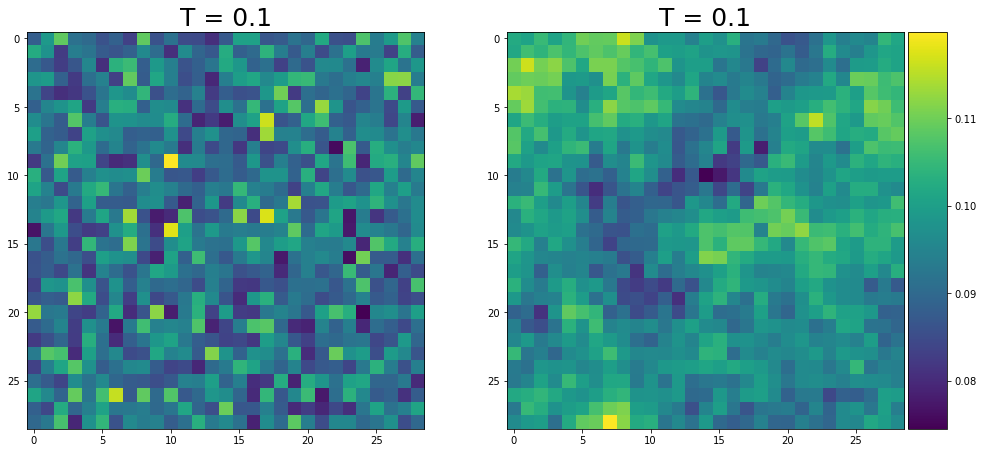

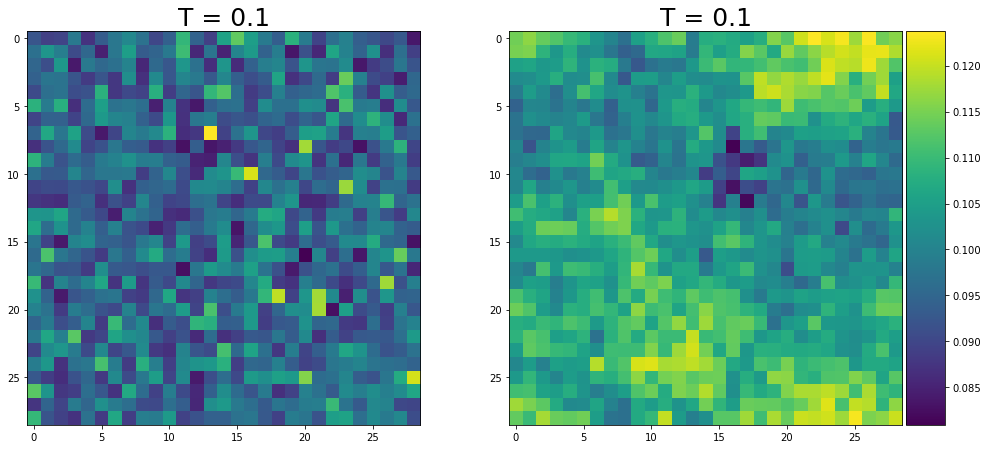

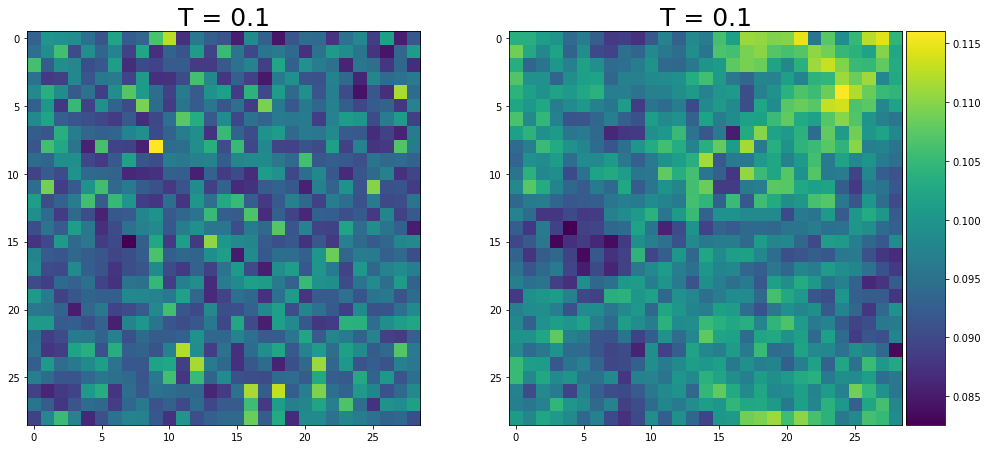

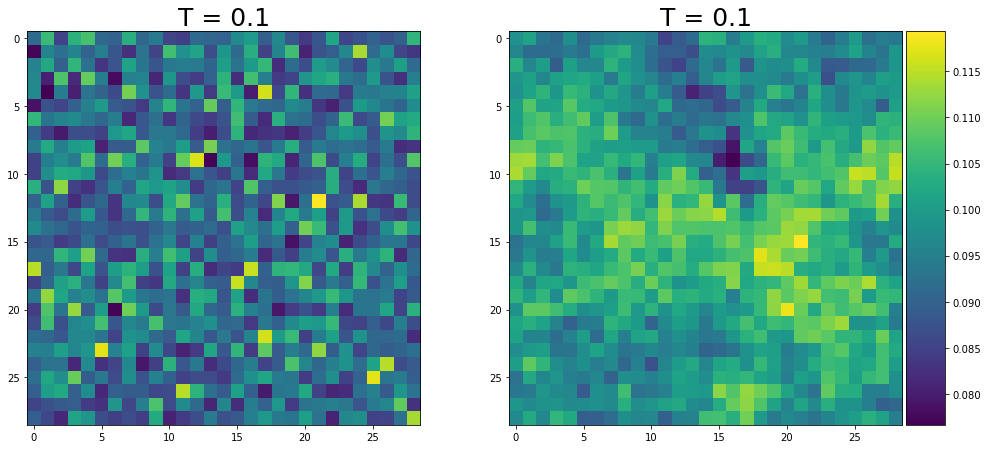

In [14]:
for i in range(10):
    fig = plt.figure(figsize=(20, 10))

    ax0 = fig.add_subplot(1,3,1)
    ax1 = fig.add_subplot(1,3,2)

    ax0.set_title("T = 0.1", fontsize=25)
    ax1.set_title("T = 0.1", fontsize=25)

    width = int(nSpots**(1/2))
    r = thetas[:, i]/thetas.sum(axis=1)
    hts = list2matrix(r)
    im0 = ax0.imshow(hts)

    width = int(nSpots**(1/2))
    r = thetas_set[:, i]/thetas_set.sum(axis=1)
    hts = list2matrix(r)
    im1 = ax1.imshow(hts)

    divider0 = make_axes_locatable(ax0)
    cax0 = divider0.append_axes("right", size="10%", pad=0.05)

    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="10%", pad=0.05)

    cbar0 = fig.colorbar(im0, cax = cax0)
    fig.delaxes(fig.axes[2])

    cbar1 = fig.colorbar(im1, cax = cax1)

    fig.tight_layout(pad=1)

    plt.show()